In [87]:
# Imprting libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix

In [88]:
data = pd.read_csv("Twitter_Data.csv")           # Converted csv file of dataset into pandas dataframe
print(data.shape)                                # To get total number of rows and columns of this data
data.head()                                      # To print first 5 rows of data

(162980, 2)


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [89]:
data.info()                                      # To find all the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [90]:
data.dropna(axis = 0, inplace = True)           # To drop all rows containg null values from data
data['category'].value_counts()                 # To count total positive, neutral and negative tweets in data

 1.0    72249
 0.0    55211
-1.0    35509
Name: category, dtype: int64

In [91]:
# CountVectorizer is used to transform a given text into a vector on the basis of the frequency of each word that occures in the entire text
cv = CountVectorizer(max_features=10000)        # Here we are taking 10000 words which are the most frequent in the entire text
cv.fit(data['clean_text'])                      # We are using CountVectorizer 'for clean_text' column of data

train, test = train_test_split(data, test_size=0.2, random_state=40)   # Splitting training and test data in 80:20 ratio

x_train = cv.transform(train['clean_text'])     # To get feature of training data
x_test = cv.transform(test['clean_text'])       # To get feature of test data

In [92]:
# OneVsRestClassifier will fit one classifier per class. For each classifier, the class is fitted against all the other classes by using LogisticRegression
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))   
clf.fit(x_train, train['category'])    # Train model using training data

y_pred = clf.predict(x_test)           # To get predicted values of test feature from trained model

In [93]:
print("Accuracy : ",100*clf.score(x_test, test['category']))    # Accuracy of model on test data

Accuracy :  95.19236669325643


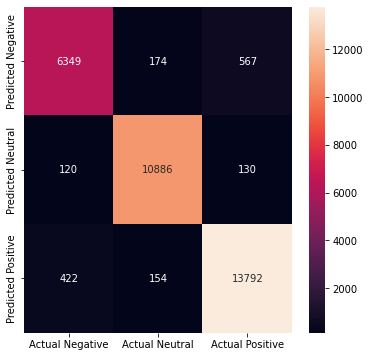

In [94]:
# Confusion matrix is useful to analyze perf
mat = confusion_matrix(test['category'], y_pred)      
plt.figure(figsize = (6, 6))
sns.heatmap(mat, annot = True, fmt="d", xticklabels=['Actual Negative', 'Actual Neutral','Actual Positive'], yticklabels=['Predicted Negative', 'Predicted Neutral','Predicted Positive']);